In [1]:
from read_penguin import load_2D_data
import matplotlib.pyplot as plt
import numpy as np
import geometry as geo
from Interpolate import biInterpolate
from Search import binSearch

In [2]:
def velocity(x, y, data):
    xVals = data[1]
    yVals = data[2]
    xVel = data[5]
    yVel = data[6]
    xPoints = binSearch(xVals, 0, len(xVals), x)
    yPoints = binSearch(yVals, 0, len(yVals), y)
    if(xPoints[0] == -np.infty):
        return (0,0)
    elif(xPoints[1] == np.infty):
        return (0,0)
    if(yPoints[0] == -np.infty):
        yPoints = (0, len(yVals)-2)
    elif(yPoints[1] == np.infty):
        yPoints = (len(yVals)-2, 0)
    lowx = xPoints[0]
    highx = xPoints[1]
    lowy = yPoints[0]
    highy = yPoints[1]
    xsquareVals = [xVel[lowy,lowx], xVel[highy,lowx], xVel[lowy,highx], xVel[highy,highx]]
    targetCoords = (x,y)
    minCoords = (xVals[lowx], yVals[lowy])
    maxCoords = (xVals[highx], yVals[highy])
    vx = biInterpolate(targetCoords, xsquareVals, minCoords, maxCoords)
    
    ysquareVals = [yVel[lowy,lowx], yVel[highy,lowx], yVel[lowy,highx], yVel[highy,highx]]
    targetCoords = (x,y)
    minCoords = (xVals[lowx], yVals[lowy])
    maxCoords = (xVals[highx], yVals[highy])
    vy = biInterpolate(targetCoords, ysquareVals, minCoords, maxCoords)
    
    vels = (vx, vy)
    return geo.sphericalToCartesianVelocity(targetCoords, vels, dim=2)

In [44]:
def cartVelocity(x, y, xVals, yVals, xVel, yVel):
    if(x >= xVals[-1] or x <= xVals[0]):
        return (0,0)
    if(y >= yVals[-1] or y <= yVals[0]):
        return (0,0)
    xPoints = binSearch(xVals, 0, len(xVals), x)
    yPoints = binSearch(yVals, 0, len(yVals), y)
    if(xPoints[0] == -np.infty):
        xPoints = (0,0)
    elif(xPoints[1] == np.infty):
        xPoints = (0,0)
    if(yPoints[0] == -np.infty):
        yPoints = (0,0)
    if(yPoints[1] == np.infty):
        yPoints = (0,0)
    lowx = xPoints[0]
    highx = xPoints[1]
    lowy = yPoints[0]
    highy = yPoints[1]
    xsquareVals = [xVel[lowy,lowx], xVel[highy,lowx], xVel[lowy,highx], xVel[highy,highx]]
    targetCoords = (x,y)
    minCoords = (xVals[lowx], yVals[lowy])
    maxCoords = (xVals[highx], yVals[highy])
    vx = biInterpolate(targetCoords, xsquareVals, minCoords, maxCoords)
    
    ysquareVals = [yVel[lowy,lowx], yVel[highy,lowx], yVel[lowy,highx], yVel[highy,highx]]
    targetCoords = (x,y)
    minCoords = (xVals[lowx], yVals[lowy])
    maxCoords = (xVals[highx], yVals[highy])
    vy = biInterpolate(targetCoords, ysquareVals, minCoords, maxCoords)
    
    vels = (vx, vy)
    v = geo.cartesianToSphericalVelocity(targetCoords, vels, dim = 2)
    return v

In [4]:
#Loading Data
xres = 384
yres = 768
filepath = "/home/afkirby/penguinPlots/2DGammaChange/"
gam10data = load_2D_data("/scratch/afkirby/2DAdiabaticParameterChange/Gamma1.0/", xres, yres, "h50_1p1J_e0_PPM4", 0)

In [5]:
#Planetary Coordinates/Velocity
planetCoords = (1, np.pi)
planetCoordsCart = geo.sphericalToCartesian(planetCoords, dim = 2)
planetVel = (0, 1)
planetVelCart = geo.sphericalToCartesianVelocity(planetCoords, planetVel, dim = 2)

In [6]:
#Creating Cartesian Grid
coordX = np.ndarray(1001)
coordY = np.ndarray(1001)
for i in range(1001):
    coordX[i] = -gam10data[1][-1] + 2*gam10data[1][-1]*(i)/1000
    
for j in range(1001):
    coordY[j] = -gam10data[1][-1] + 2*gam10data[1][-1]*(j)/1000
    
gam10velCartX = np.ndarray((1001,1001))
gam10velCartY = np.ndarray((1001,1001))
for i in range(1001):
    for j in range(1001):
        cartesian = (coordX[i], coordY[j])
        polar = geo.cartesianToSpherical(cartesian, 2)
        velocities = velocity(polar[0], polar[1], gam10data)
        gam10velCartX[j,i] = velocities[0]
        gam10velCartY[j,i] = velocities[1]

/home/afkirby/PEnGUIn/read/geometry.py:18: RuntimeWarning: invalid value encountered in double_scalars
  phi = np.arccos(z/r)


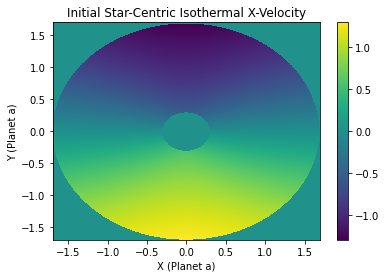

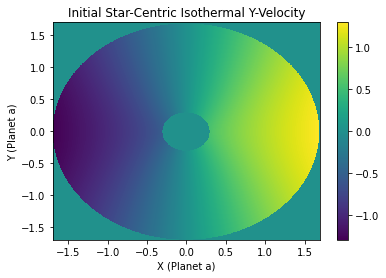

In [7]:
plt.figure()
plt.pcolor(coordX, coordY, gam10velCartX)
plt.title("Initial Star-Centric Isothermal X-Velocity")
plt.xlabel("X (Planet a)")
plt.ylabel("Y (Planet a)")
plt.colorbar()
plt.show()

plt.figure()
plt.pcolor(coordX, coordY, gam10velCartY)
plt.title("Initial Star-Centric Isothermal Y-Velocity")
plt.xlabel("X (Planet a)")
plt.ylabel("Y (Planet a)")
plt.colorbar()
plt.show()

In [8]:
#Shifting Cartesian Grid/Velocities
for i in range(1001):
    for j in range(1001):
        r = np.sqrt(coordX[i]**2 + coordY[j]**2)
        if(r <= gam10data[1][0] or r >= gam10data[1][-1]):
            gam10velCartX[i,j] = 0
            gam10velCartY[i,j] = 0
        else:
            gam10velCartX[i,j] = gam10velCartX[i,j] - planetVelCart[0]
            gam10velCartY[i,j] = gam10velCartY[i,j] - planetVelCart[1]
for k in range(1001):
    coordX[k] = coordX[k] - planetCoordsCart[0]
    coordY[k] = coordY[k] - planetCoordsCart[1]

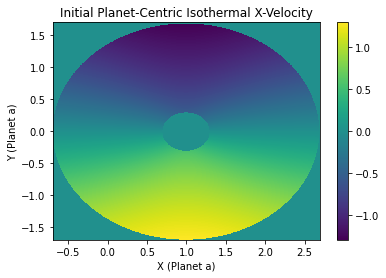

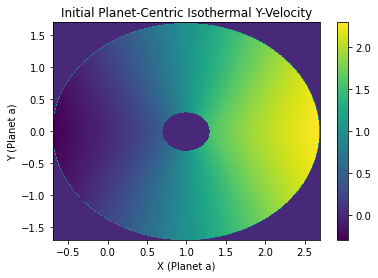

In [9]:
plt.figure()
plt.pcolor(coordX, coordY, gam10velCartX)
plt.title("Initial Planet-Centric Isothermal X-Velocity")
plt.xlabel("X (Planet a)")
plt.ylabel("Y (Planet a)")
plt.colorbar()
plt.show()

plt.figure()
plt.pcolor(coordX, coordY, gam10velCartY)
plt.title("Initial Planet-Centric Isothermal Y-Velocity")
plt.xlabel("X (Planet a)")
plt.ylabel("Y (Planet a)")
plt.colorbar()
plt.show()

In [63]:
#Creating Planet-Centric Polar Grid
gam10VelPlanetX = np.ndarray((xres, yres))
gam10VelPlanetY = np.ndarray((xres, yres))
planetR = np.ndarray(xres+1)
planetTheta = np.ndarray(yres+1)
rs = 0.01
for i in range(xres+1):
    planetR[i] = 0.1*i/(xres) + rs
for j in range(yres+1):
    planetTheta[j] = 2*np.pi*j/(yres)
    
for i in range(xres):
    for j in range(yres):
        polar = (planetR[i], planetTheta[j])
        cartesian = geo.sphericalToCartesian(polar, 2)
        velocities = cartVelocity(cartesian[0], cartesian[1], coordX, coordY, gam10velCartX, gam10velCartY)
        gam10VelPlanetX[i,j] = velocities[0]
        gam10VelPlanetY[i,j] = velocities[1]

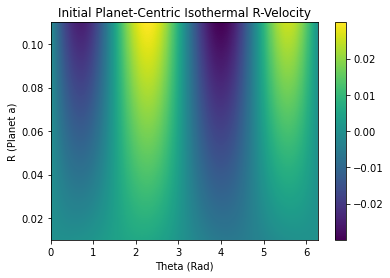

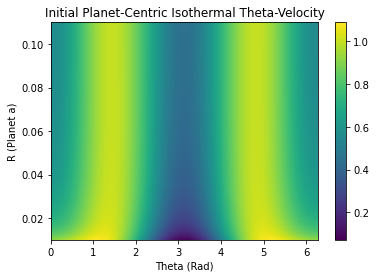

In [64]:
plt.figure()
plt.pcolor(planetTheta, planetR, gam10VelPlanetX)
plt.title("Initial Planet-Centric Isothermal R-Velocity")
plt.xlabel("Theta (Rad)")
plt.ylabel("R (Planet a)")
plt.colorbar()
plt.show()

plt.figure()
plt.pcolor(planetTheta, planetR, gam10VelPlanetY)
plt.title("Initial Planet-Centric Isothermal Theta-Velocity")
plt.xlabel("Theta (Rad)")
plt.ylabel("R (Planet a)")
plt.colorbar()
plt.show()